# Author : Sarthak Sethi
## GRIP - The Sparks Foundation- Data Science & Business Analytics
### TASK 1 : Prediction using Supervised ML

To predict the score of a student who studies for 9.25 hrs/ day

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Importing required dataset

In [2]:
dataset=pd.read_csv("http://bit.ly/w-data")
print("Dataset imported successfully")

dataset.head(5)

Dataset imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# The dimensionality of dataset
dataset.shape

(25, 2)

In [5]:
# checking the info of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

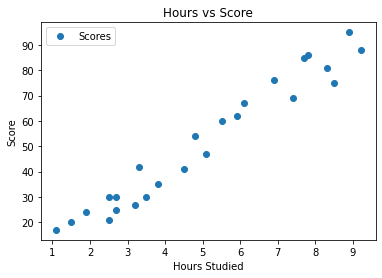

In [8]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

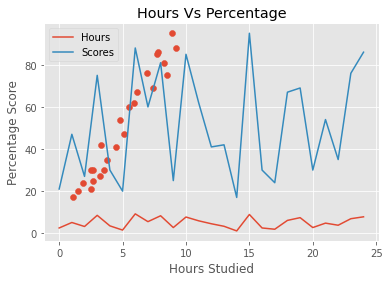

In [9]:
# visualizing with line plot
plt.style.use('ggplot')
dataset.plot(kind='line')
plt.scatter(x=dataset.Hours,y=dataset.Scores)
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours Vs Percentage")
plt.show()

From the above graph we can conclude that there is a positive linear relation between the number of hours studied and percentage of score

### Data preparation

In [11]:
A = dataset.iloc[:, :-1].values  
B = dataset.iloc[:, 1].values

### Training Algorithm

In [12]:
# Using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=0) 

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(A_train.reshape(-1,1), B_train) 
print("Training complete.")

Training complete.


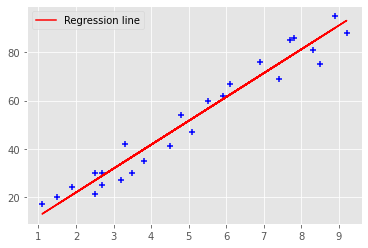

In [14]:
# Plotting the regression line
line = regressor.coef_*A+regressor.intercept_

# Plotting for the test data
plt.scatter(A, B, color='blue', marker='+')
plt.plot(A, line,color='red', label='Regression line')
plt.legend()
plt.show()

### Making Predictions

In [15]:
# Testing data
print(A_test)
# Model Prediction 
B_pred = regressor.predict(A_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing actual result to the predicted result

In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': B_test, 'Predicted': B_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting the score if a student studies for 9.25 hrs

In [18]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the model

This step is to evaluate the performance of algorithm. This step is important to compare how well algorithms perform on a particular dataset. Here diffrent errors have been calculated to compare the model performance and predict the accuracy.

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(B_test, B_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(B_test, B_pred))
print('R-2:', metrics.r2_score(B_test, B_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
R-2: 0.9454906892105356
